In [19]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from scipy import stats


In [4]:
df = pd.read_csv("mushroom_cleaned.csv")
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


Let's find out how many entries there are in our dataset, using shape function.


In [6]:
df.shape

(54035, 9)

Using dtypes function, we will take a look at our column names and types of data.


In [7]:
df.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

Below, we will check for any missing values.



In [8]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

Now, let's provide descriptive statistics.



In [9]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


Next, we will calculate the correlation between class and all other columns in df.



In [12]:
df_corr = df.corr()["class"][:-1]
df_corr.sort_values()

stem-width        -0.182856
cap-diameter      -0.165676
cap-shape         -0.133338
stem-color        -0.128339
season            -0.082919
gill-color        -0.063947
gill-attachment   -0.052541
stem-height        0.183354
Name: class, dtype: float64

Observations from Data Exploration:¶
Dataset has 54035 rows and 9 columns.
Data type of all columns is numerical (float or integer).
All values are non-null.
Correlation between class and feature columns in df is low, absolute value ranging between 5% and 18.3%.

Let's explore outliers. For this, we will calculate the z-scores for each column in the DataFrame df, then provide descriptive statistics of these z-scores rounded to three decimal places.

Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. In another words, Z-score is the value that quantifies relationship between a data point and a standard deviation and mean values of a group of points. Data points which are too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used. For example, if the Z-score value is greater than or less than 3 or -3 standard deviations respectively, that data point will be identified as a outlier.

In [14]:
z_scores = pd.DataFrame(stats.zscore(df),columns=df.columns)

z_scores.describe().round(3)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000
mean,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.576,-1.852,-0.961,-2.290,-1.165,-1.344,-2.581,-3.026,-1.104
25%,-0.773,-0.926,-0.961,-0.728,-0.750,-0.806,-0.741,-0.208,-1.104
50%,-0.117,0.463,-0.512,0.210,-0.255,-0.164,0.792,-0.029,0.906
75%,0.594,0.926,0.834,0.834,0.454,0.603,0.792,-0.029,0.906
max,3.678,0.926,1.731,1.147,4.726,3.220,1.098,2.788,0.906


In 4 columns of our dataframe, there are absolute values with Z-score higher than 3: stem-height (max z-score = 4.7), cap-diameter (max z-score = 3.7), stem-width (max z-score = 3.2) and season (min z_score = -3.026).

Let's drop rows containing outliers (with Z-score > 3).

In [17]:
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Drop the identified rows containing outliers
df_no_outliers = df.drop(outliers.index)

In [18]:
new_num_r = df_no_outliers.shape[0]
old_num_r = df.shape[0]
removed = old_num_r - new_num_r

print("New dataframe has {} rows. {} rows were removed.".format(new_num_r, removed))

New dataframe has 50397 rows. 3638 rows were removed.


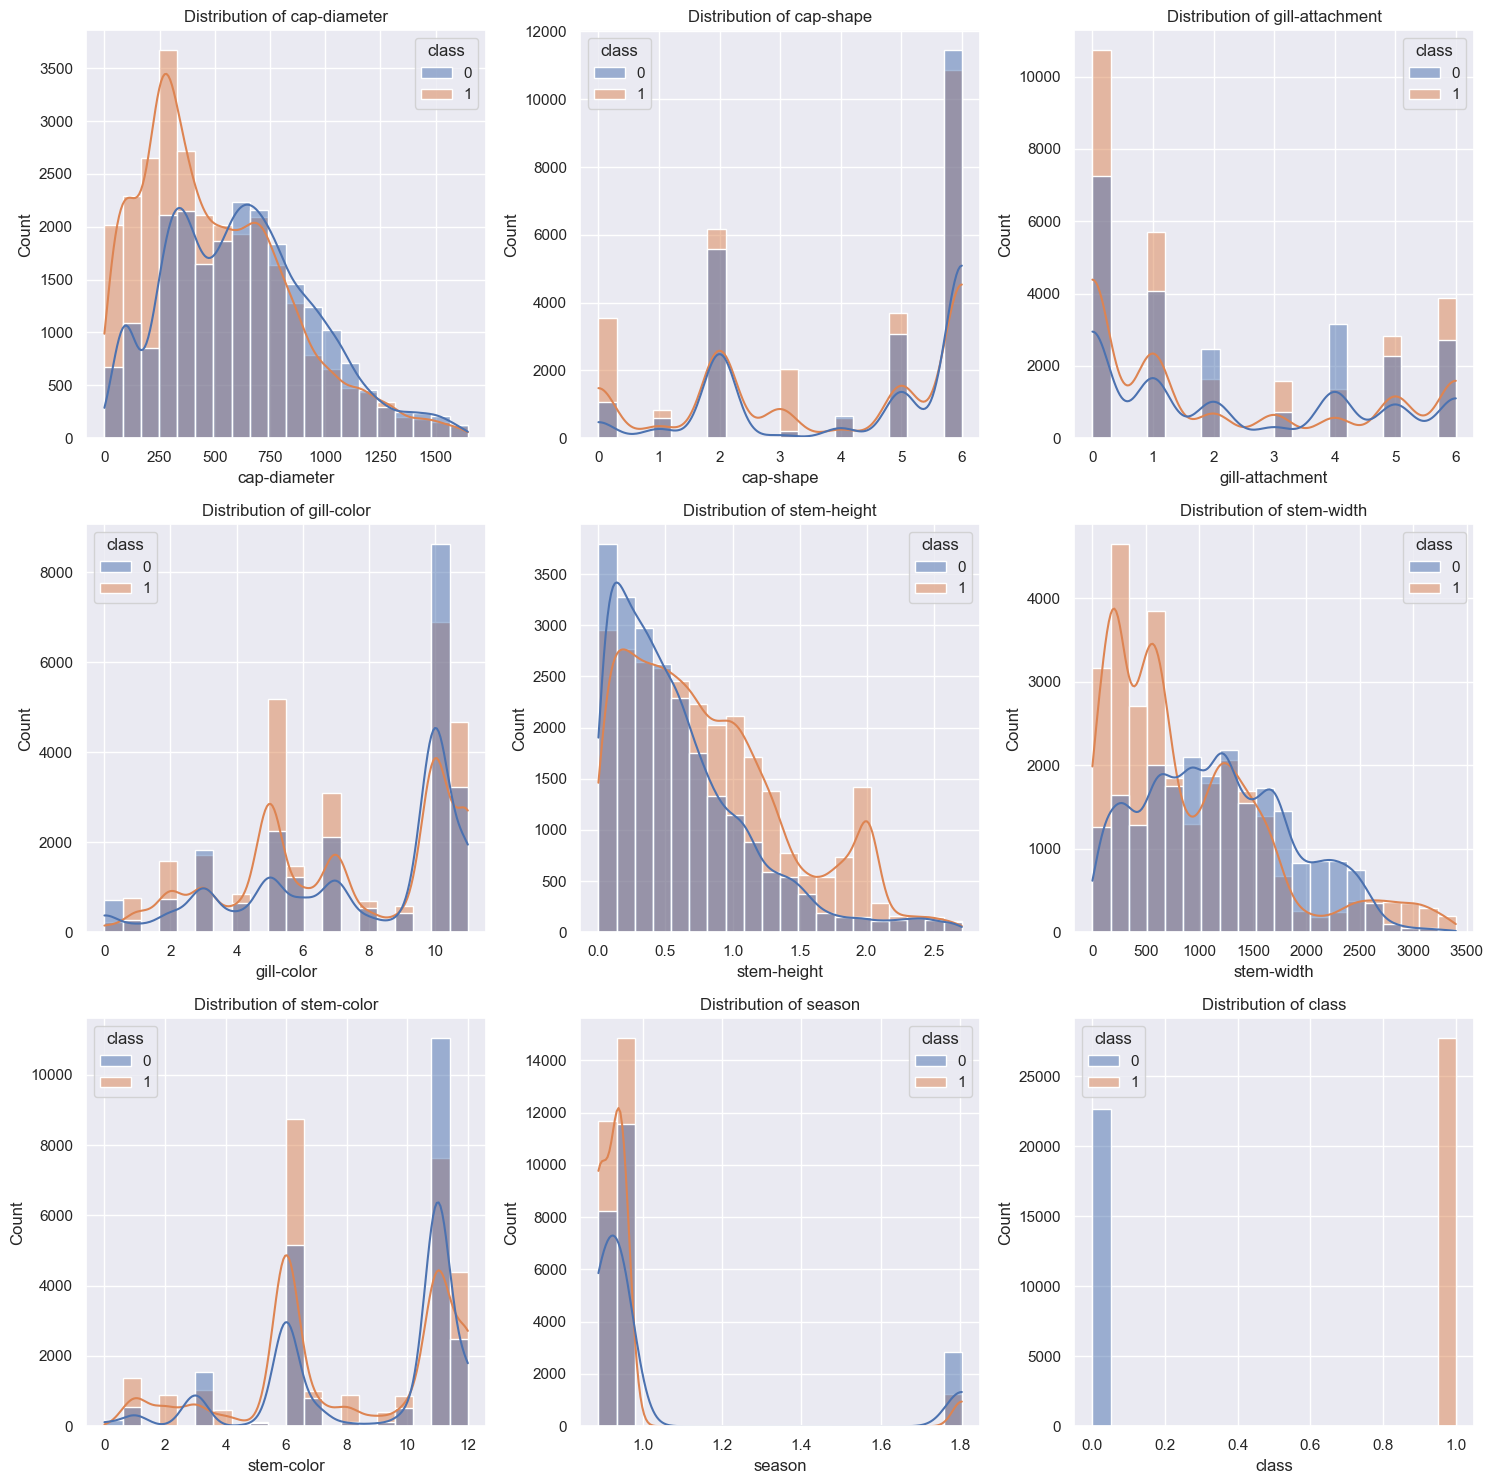

In [20]:
sns.set()

# Create subplots with 3 columns and 3 rows
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column in the DataFrame
for i, column in enumerate(df_no_outliers.columns):
    # Create a histogram plot for the current column with hue
    sns.histplot(data=df_no_outliers, x=column, hue='class', kde=True, bins=20, ax=axes[i])
    
    # Set title for the plot
    axes[i].set_title(f'Distribution of {column}')
    
# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Display the plot
plt.show()


Set a variable X equal to the numerical features and a variable y equal to the "class" column.

In [21]:
X = df_no_outliers.loc[:, df_no_outliers.columns != "class"]
y = df_no_outliers['class']

It is important to get all attributes to have the same scale. One of the common ways to do it is standardization: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.

Scikit-learn library provides StandardScaler for standardization needs.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101, stratify=y)

Using cross validation, let's determine the hyperparameters and fit models using L1 and L2 regularization.¶


In [24]:
from sklearn.linear_model import LogisticRegressionCV

# Define a custom grid for Cs to ensure a wide range of values are tested
custom_cs = [0.001, 0.01, 0.1, 1, 10, 100]

# L1 regularized logistic regression with cross-validation
lr_l1 = LogisticRegressionCV(Cs=custom_cs, cv=5, penalty='l1', solver='liblinear', verbose=0)

# Fit the model on the training data
lr_l1.fit(X_train, y_train)

# Extract the best C value
best_C = lr_l1.C_[0]
print(f"Best C value: {best_C}")
print("\n")

# Extract the coefficients of the best model
best_coefficients = lr_l1.coef_
print(f"Coefficients of the best model: {best_coefficients}")
print("\n")

# Extract the mean cross-validated scores for each fold and each parameter
cv_scores = lr_l1.scores_[1]  # Assuming binary classification with target classes 0 and 1
print(f"Cross-validated scores for each parameter: {cv_scores}")
print("\n")

# Optionally, you can also find the mean cross-validated score for the best parameter
best_score = cv_scores.mean(axis=0)[custom_cs.index(best_C)]
print(f"Mean cross-validated score for the best C value: {best_score}")

Best C value: 0.01


Coefficients of the best model: [[-0.17995451 -0.19820642  0.01499666 -0.04801038  0.47372153 -0.20848658
  -0.22027333 -0.31917856]]


Cross-validated scores for each parameter: [[0.64243197 0.64597506 0.64512472 0.64512472 0.64498299 0.64484127]
 [0.64058957 0.64710884 0.64526644 0.64512472 0.64526644 0.64512472]
 [0.64932672 0.6551382  0.65499646 0.65527994 0.65527994 0.65527994]
 [0.6443657  0.64819277 0.64932672 0.64890149 0.64875974 0.64875974]
 [0.64408221 0.64975195 0.65031892 0.65060241 0.65060241 0.65060241]]


Mean cross-validated score for the best C value: 0.6492333640283422


In [25]:
lr_l2 = LogisticRegressionCV(Cs=custom_cs, cv=5, penalty='l2', solver='liblinear')
lr_l2.fit(X_train, y_train)

# Extract the best C value
best_C = lr_l2.C_[0]
print(f"Best C value: {best_C}")
print("\n")

# Extract the coefficients of the best model
best_coefficients = lr_l2.coef_
print(f"Coefficients of the best model: {best_coefficients}")
print("\n")

# Extract the mean cross-validated scores for each fold and each parameter
cv_scores = lr_l2.scores_[1]  # Assuming binary classification with target classes 0 and 1
print(f"Cross-validated scores for each parameter: {cv_scores}")
print("\n")

# Optionally, you can also find the mean cross-validated score for the best parameter
best_score = cv_scores.mean(axis=0)[custom_cs.index(best_C)]
print(f"Mean cross-validated score for the best C value: {best_score}")


Best C value: 0.001


Coefficients of the best model: [[-0.17497572 -0.18497653  0.01889231 -0.05629912  0.42247424 -0.19639139
  -0.20185927 -0.28859273]]


Cross-validated scores for each parameter: [[0.64668367 0.64569161 0.64498299 0.64498299 0.64498299 0.64498299]
 [0.6468254  0.64512472 0.64512472 0.64512472 0.64512472 0.64512472]
 [0.65967399 0.65712261 0.65527994 0.65527994 0.65527994 0.65527994]
 [0.65386251 0.64989369 0.64904323 0.64890149 0.64875974 0.64875974]
 [0.65017718 0.65046067 0.65074415 0.65060241 0.65060241 0.65060241]]


Mean cross-validated score for the best C value: 0.6514445497074333


The scores are quite low and very similar. Let's proceed with the L2 regularized model.¶
Now, we will predict the class for L2 regularized model¶

In [26]:
l2_preds = lr_l2.predict(X_test)


Evaluate the model¶


In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, l2_preds))

              precision    recall  f1-score   support

           0       0.62      0.55      0.59      6794
           1       0.67      0.73      0.69      8326

    accuracy                           0.65     15120
   macro avg       0.64      0.64      0.64     15120
weighted avg       0.65      0.65      0.65     15120



Confusion Matrix¶


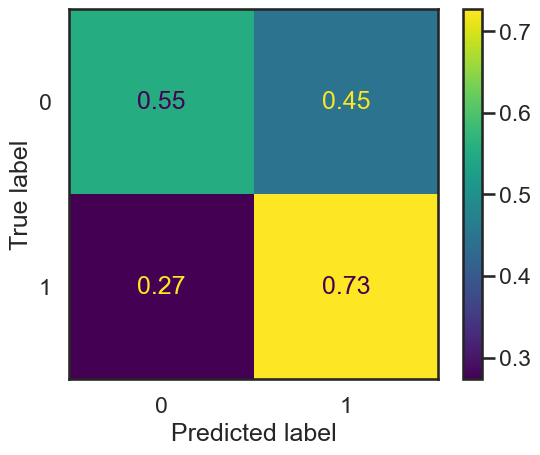

In [28]:
cf = confusion_matrix(y_test, l2_preds, normalize='true')

sns.set(style="white", context="talk")
disp = ConfusionMatrixDisplay(confusion_matrix=cf)
disp.plot()
plt.show()

As we can see, 73% of poisonous mushrooms are labeled correctly. But we have a big confusion in edible mushrooms, almost half of them (45%) are labeled as poisonous. We will need different model. Let's try another simple model KNN.

We will start with k=1, and later will choose better K value.



In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
knn_preds = knn.predict(X_test)

Evaluation

In [31]:
print(confusion_matrix(y_test,knn_preds))


[[6687  107]
 [ 119 8207]]


In [32]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6794
           1       0.99      0.99      0.99      8326

    accuracy                           0.99     15120
   macro avg       0.98      0.98      0.98     15120
weighted avg       0.99      0.99      0.99     15120



Choosing a K Value¶


In [33]:
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

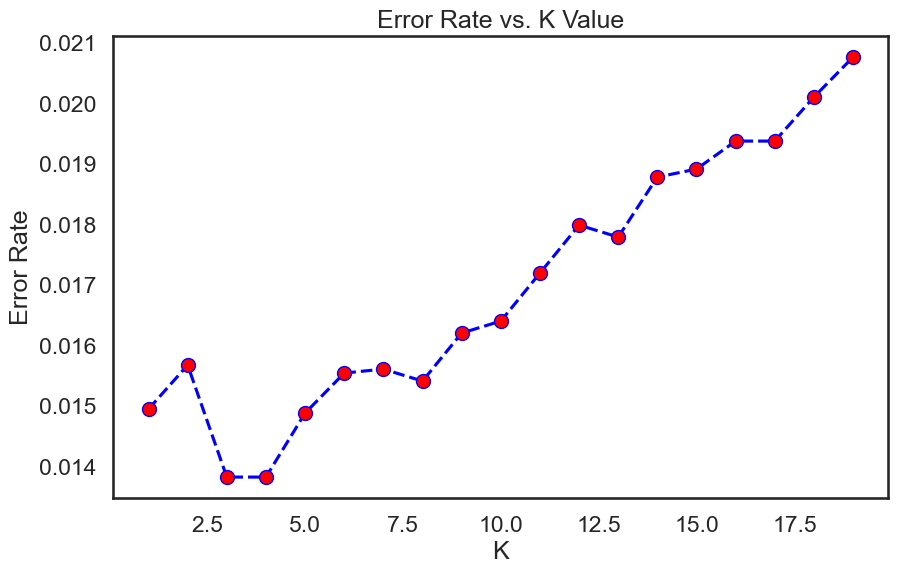

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

Here we can see that at K=3 the error rate is the lowest and it's around 0.013. Let's retrain the KNN model with K=3 and check the classification report!

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
knn_preds = knn.predict(X_test)

print('K Nearest Neighbors')
print('\n')
print(confusion_matrix(y_test,knn_preds))
print('\n')
print(classification_report(y_test,knn_preds))

K Nearest Neighbors


[[6688  106]
 [ 103 8223]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6794
           1       0.99      0.99      0.99      8326

    accuracy                           0.99     15120
   macro avg       0.99      0.99      0.99     15120
weighted avg       0.99      0.99      0.99     15120



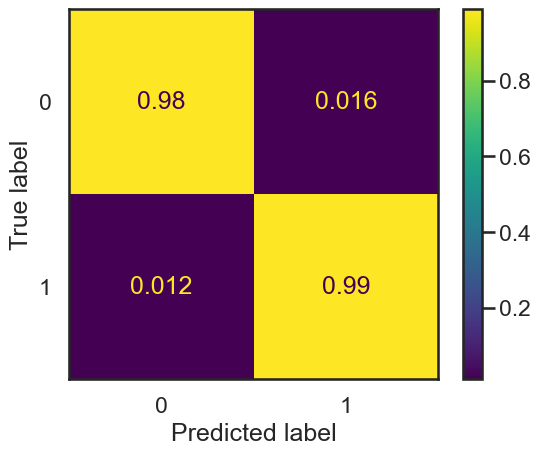

In [36]:
cf = confusion_matrix(y_test, knn_preds, normalize='true')

sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=knn.classes_)
disp.plot()
plt.show()